In [13]:
# imports
import pandas as pd
import numpy as np
import json, os
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# loading in data
df_00 = pd.read_csv('Data/final_tmbd_data_2000.csv.gz')
df_00.head()

,imdb_id,title,revenue,budget,rating
0,0,NaN,NaN,NaN,NaN
1,tt0113026,The Fantasticks,0.0,10000000.0,NaN
2,tt0113092,For the Cause,0.0,0.0,NaN
3,tt0118694,In the Mood for Love,12854953.0,150000.0,PG
4,tt0118852,Chinese Coffee,0.0,0.0,R


In [15]:
df_01 = pd.read_csv('Data/final_tmbd_data_2001.csv.gz')
df_01.head()

,imdb_id,title,revenue,budget,rating
0,0,NaN,NaN,NaN,NaN
1,tt0035423,Kate & Leopold,76019048.0,48000000.0,PG-13
2,tt0118589,Glitter,5271666.0,22000000.0,PG-13
3,tt0118652,The Attic Expeditions,0.0,1000000.0,R
4,tt0120166,The Sorcerer's Apprentice,0.0,0.0,NR


### Exploratory Data Analysis

In [16]:
# making one dataframe
df = pd.concat([df_00, df_01], axis = 0)
print(len(df))
df.head()

1647


,imdb_id,title,revenue,budget,rating
0,0,NaN,NaN,NaN,NaN
1,tt0113026,The Fantasticks,0.0,10000000.0,NaN
2,tt0113092,For the Cause,0.0,0.0,NaN
3,tt0118694,In the Mood for Love,12854953.0,150000.0,PG
4,tt0118852,Chinese Coffee,0.0,0.0,R


In [17]:
# movies with some financial data
df = df.drop(df[(df['revenue'] == 0) & (df['budget'] == 0)].index)
print(len(df))
df.head()

226


,imdb_id,title,revenue,budget,rating
0,0,NaN,NaN,NaN,NaN
1,tt0113026,The Fantasticks,0.0,10000000.0,NaN
3,tt0118694,In the Mood for Love,12854953.0,150000.0,PG
5,tt0119273,Heavy Metal 2000,0.0,15000000.0,R
8,tt0120263,Songs from the Second Floor,80334.0,0.0,NaN


In [18]:
# Question 1. How many movies had some valid financial information:
df.dropna(inplace = True)
print(f'There are {len(df)} movies with financial data.')
df.head()

There are 178 movies with financial data.


,imdb_id,title,revenue,budget,rating
3,tt0118694,In the Mood for Love,12854953.0,150000.0,PG
5,tt0119273,Heavy Metal 2000,0.0,15000000.0,R
13,tt0120753,The Million Dollar Hotel,105983.0,8000000.0,R
16,tt0120913,Titan A.E.,36754634.0,75000000.0,PG
17,tt0120917,The Emperor's New Groove,169327687.0,100000000.0,G


In [19]:
# Question 2: How many movies are in each category rating of the certification categories?
df['rating'].value_counts()

R        93
PG-13    52
PG       18
NR        9
G         6
Name: rating, dtype: int64

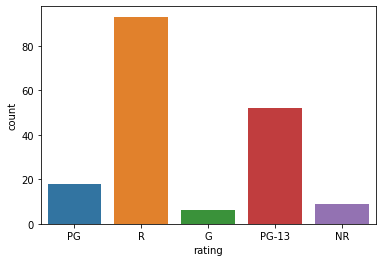

In [27]:
sns.countplot(data = df, x = df['rating']);
#plt.savefig('Data/number_movie_per_rating.png')

In [47]:
# Question 3: What is the average revenue per certification category?
df.groupby('rating')['revenue'].mean()

rating
G        8.547292e+07
NR       1.244278e+07
PG       8.518442e+07
PG-13    8.424366e+07
R        3.637910e+07
Name: revenue, dtype: float64

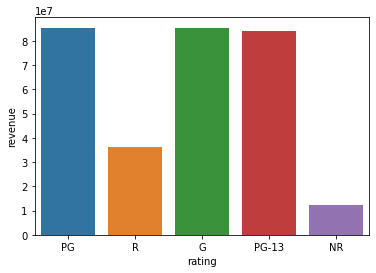

In [28]:
sns.barplot(data = df, x = df['rating'], y = df['revenue'], ci = None);
#plt.savefig('Data/revenue_per_rating.png')

In [48]:
# Question 4: What is the average budget per certification category?
df.groupby('rating')['budget'].mean()

rating
G        3.533333e+07
NR       9.633333e+06
PG       4.558333e+07
PG-13    4.238477e+07
R        2.090537e+07
Name: budget, dtype: float64

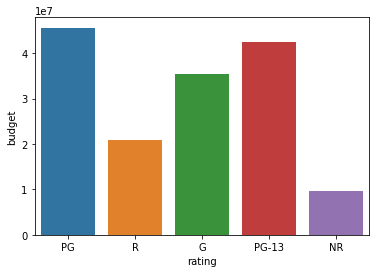

In [26]:
sns.barplot(data = df, x = df['rating'], y = df['budget'], ci = None);

### Saving final dataframe

In [49]:
# saving the combined dataframe to the Data folder
df.to_csv("Data/tmdb_results_combined.csv.gz",compression='gzip',index=False)